# Tradycyjne algorytmy Uczenia Maszynowego

### Regresja liniowa na zbiorze danych Wine

In [188]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
%matplotlib inline

In [189]:
wine_data = pd.read_csv('wine.csv')
print(wine_data.head())

   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  Wine  
0                  0.28     2.29       5.64  1.04  3.92     1065     1  
1                  0.26     1.28       4.38  1.05  3.40     1050     1  
2                  0.30     2.81       5.68  1.03  3.17     1185     1  
3                  0.24     2.18       7.80  0.86  3.45     1480     1  
4                  0.39     1.82       4.32  1.04  2.93      735     1  


In [190]:
wine_train_data, wine_test_data = train_test_split(wine_data, test_size=0.3, random_state=0)
print('Shape of training data:', wine_train_data.shape)
print('Shape of testing data:', wine_test_data.shape)

Shape of training data: (124, 14)
Shape of testing data: (54, 14)


In [191]:
wine_train_x = wine_train_data.drop(columns=['Wine'], axis=1)
wine_train_y = wine_train_data['Wine']
wine_test_x = wine_test_data.drop(columns=['Wine'], axis=1)
wine_test_y = wine_test_data['Wine']

In [192]:
model = LinearRegression()
model.fit(wine_train_x, wine_train_y)

LinearRegression()

In [193]:
print('Coefficient of model:\n', model.coef_)

Coefficient of model:
 [-6.70182448e-02  1.69541159e-02 -7.69342809e-02  3.53474538e-02
 -2.73015273e-04  2.50343113e-01 -4.79935031e-01 -3.97617685e-01
  1.02328342e-01  5.36910597e-02 -1.30090323e-01 -3.09282939e-01
 -7.16555732e-04]


In [194]:
print('Intercept of model:', model.intercept_)

Intercept of model: 3.8637468435233155


In [195]:
predict_train = model.predict(wine_train_x)
print('Wine on training data:\n', predict_train)

Wine on training data:
 [0.77170924 2.10888907 2.97144225 2.6873283  1.82245047 2.71837975
 3.06742014 1.29462112 2.37917638 2.84257751 1.79994227 2.34880986
 2.61714589 1.87752465 1.1019273  2.48305521 1.76058701 2.51398448
 1.61179934 0.77092726 1.52800876 1.62127149 3.13315135 3.26903167
 2.29428136 1.76469288 2.0167271  3.05256225 2.83582321 1.13328267
 3.06103806 1.99030748 2.10669441 2.10330414 1.80808893 2.05509696
 0.94789774 1.39175402 1.79880386 0.67940973 2.83684458 1.18769278
 2.96082354 1.10915413 1.09363831 1.91401246 0.87226075 1.69515961
 2.02841209 0.90028522 2.86058052 2.07920239 0.8497753  2.11188683
 2.21305639 1.87632036 2.51088688 1.03189443 3.06407784 3.25413006
 0.62191253 0.81622693 2.29882052 3.02717203 1.03288176 1.10062258
 1.96977964 1.91867252 1.24169504 1.00828291 1.32013152 2.84219753
 1.76605005 0.87424967 1.65274316 2.65987292 0.77175112 1.860159
 2.82197282 2.97907788 1.16397153 1.21776186 2.82836645 1.06861905
 2.89901965 2.03587848 1.2530216  1.1253

In [196]:
rmse_train = mean_squared_error(wine_train_y, predict_train) ** 0.5
print('RMSE on train dataset:', rmse_train)

RMSE on train dataset: 0.22582400052057622


In [197]:
predict_test = model.predict(wine_test_x)
print('Wine on test data:\n', predict_test)

Wine on test data:
 [1.13211767 3.07824929 1.93138907 1.53439277 1.94414186 0.93939248
 0.89517916 3.15397476 1.72382731 2.12256429 2.4292896  3.00413816
 0.82353828 1.48345134 2.88974629 1.90813857 1.09037866 0.53685558
 2.49953829 0.86296477 1.52577748 1.42398306 1.61450192 1.69414596
 2.2093621  2.08519676 1.80834563 2.20775908 1.74379445 2.98015489
 0.94003089 1.27368552 2.18579304 1.2446001  1.06559966 1.32279124
 2.69694284 2.2021798  2.15565527 2.97129683 1.16523931 1.24081161
 1.90462032 1.99571399 2.27092542 1.13908624 2.75408866 1.99534689
 2.66014329 1.12409836 2.64929603 2.77408624 1.25129387 3.26290234]


In [198]:
rmse_test = mean_squared_error(wine_test_y, predict_test) ** 0.5
print('RMSE on test dataset:', rmse_test)

RMSE on test dataset: 0.3012297878786222


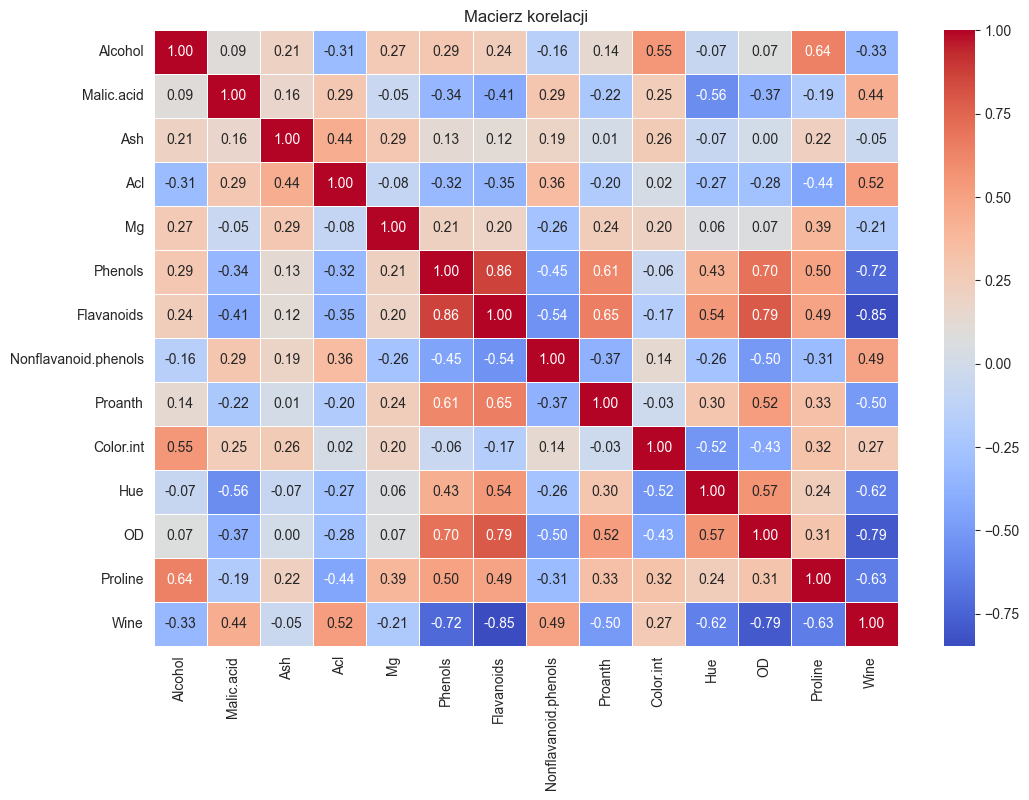

In [199]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

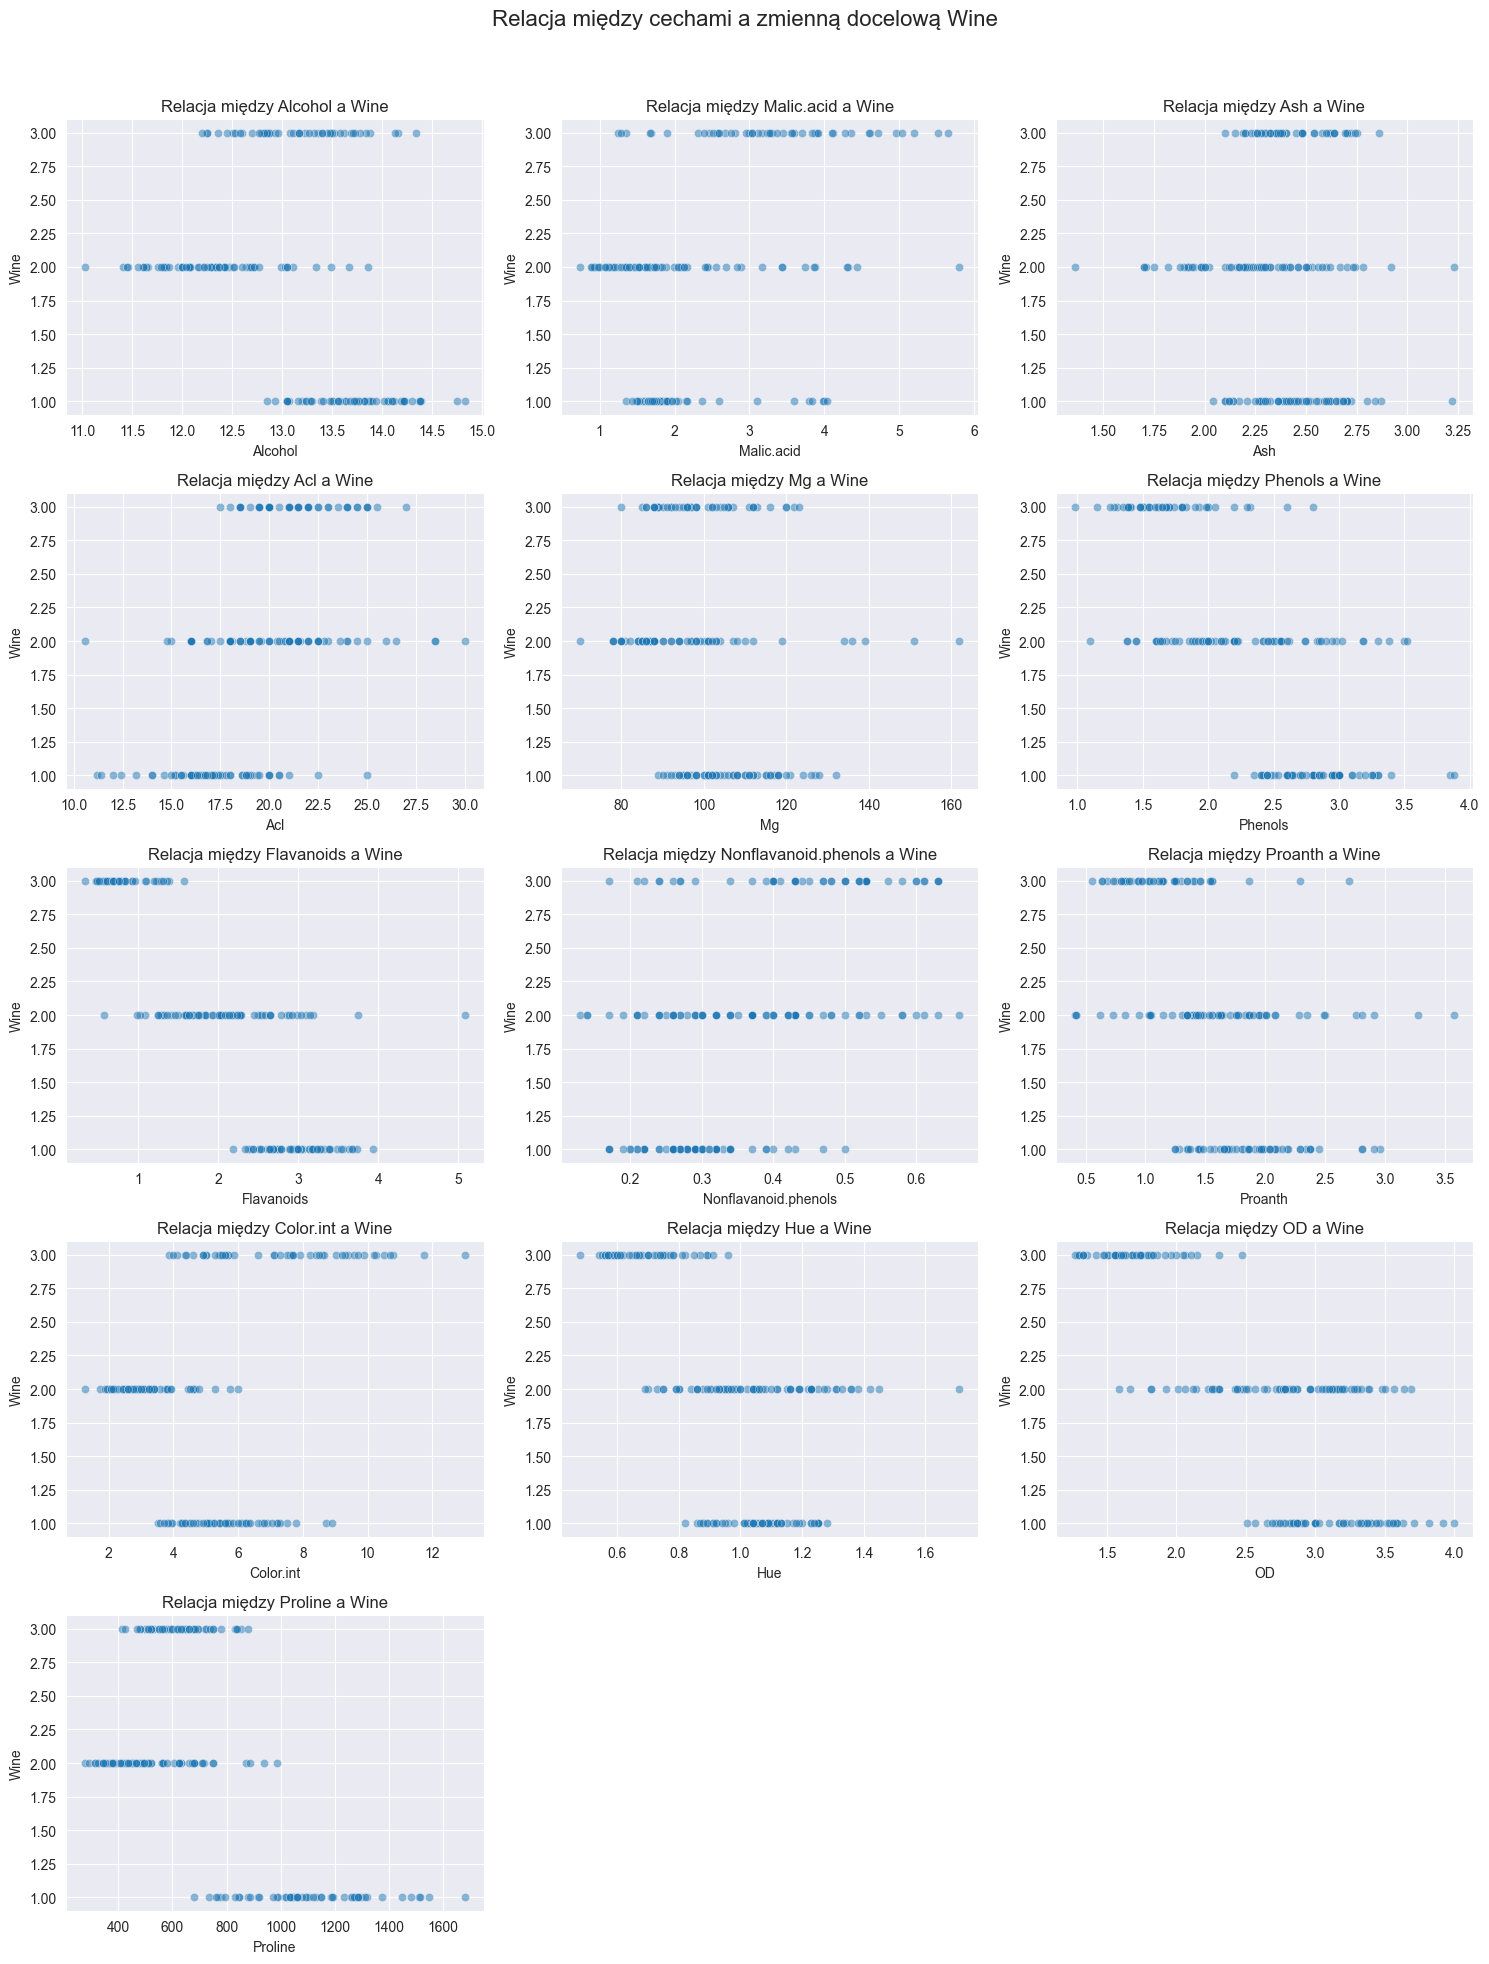

In [200]:
features = [col for col in wine_data.columns if col != 'Wine']
cols = 3
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
fig.suptitle('Relacja między cechami a zmienną docelową Wine', fontsize=16)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    sns.scatterplot(x=wine_data[feature], y=wine_data['Wine'], alpha=0.5, ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Wine')
    axes[row, col].set_title(f'Relacja między {feature} a Wine')

for idx in range(len(features), rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

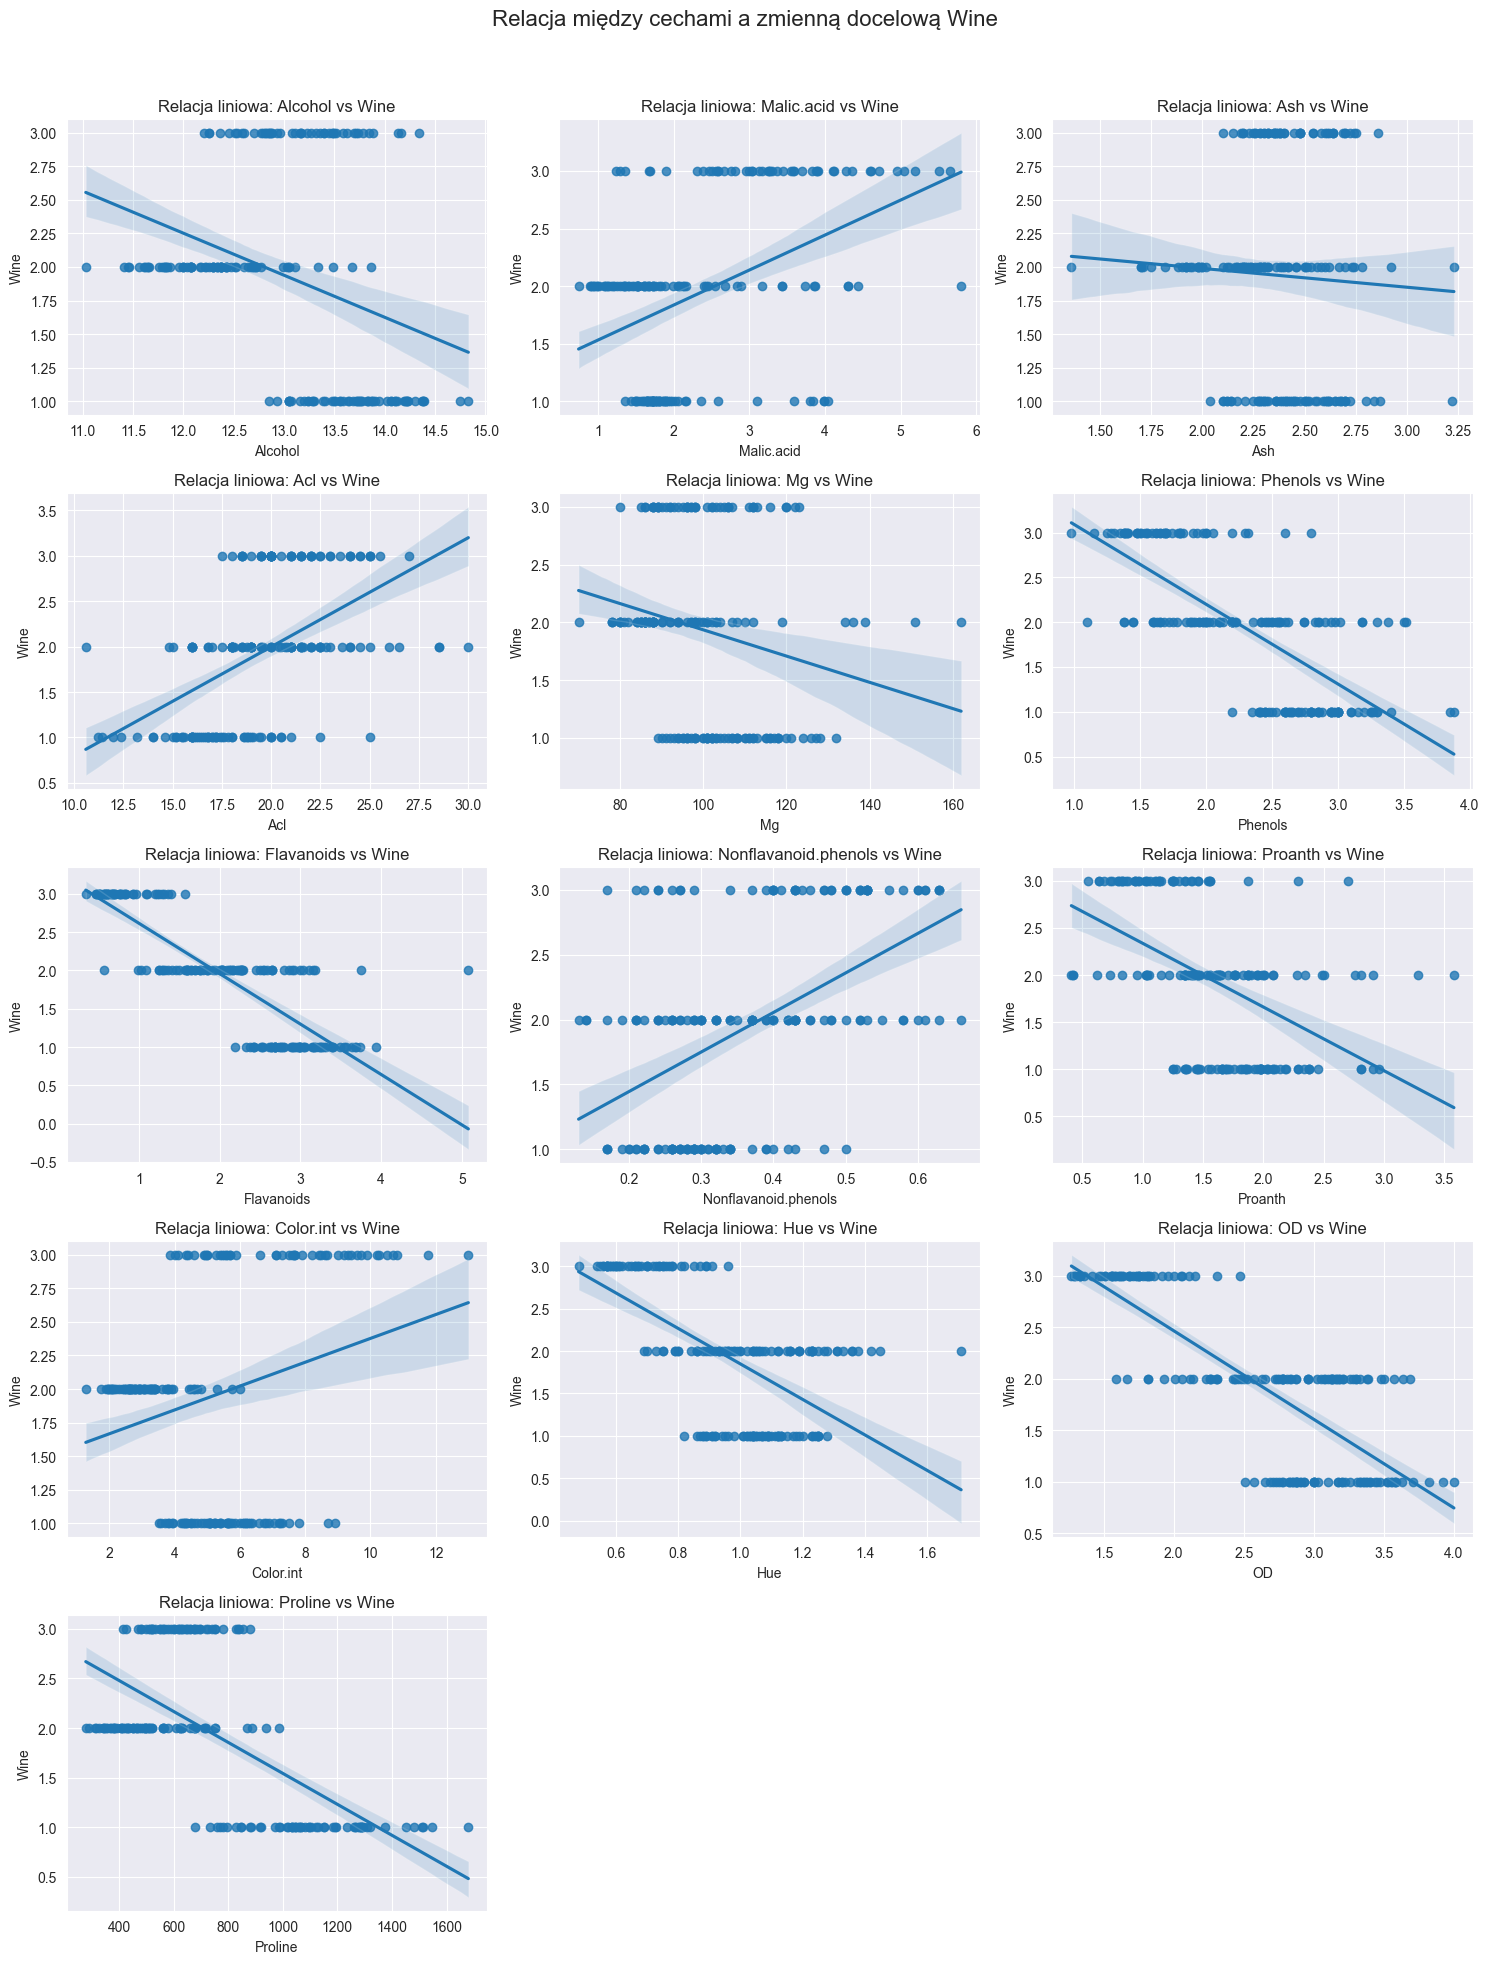

In [201]:
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
fig.suptitle('Relacja między cechami a zmienną docelową Wine', fontsize=16)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    sns.regplot(x=wine_data[feature], y=wine_data['Wine'], ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Wine')
    axes[row, col].set_title(f'Relacja liniowa: {feature} vs Wine')

for idx in range(len(features), rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

### Regresja logistyczna na zbiorze danych VLagun_Phys_Years3

In [202]:
vlagun_data = pd.read_csv('VLagun_Phys_Years3.csv')
print(vlagun_data.head())

        PSU     O2  temp.    SS    DOC    TPOC  Windspeedinsitu  Depth  Years
0  3.757624   9.46   18.3  52.0  7.500  8.5650              3.5    3.3      0
1  3.504707   9.89   19.1  50.0  7.860  8.5200              0.0    3.6      0
2  3.757624   9.66   18.1  59.0  8.172  8.4915              1.0    3.4      0
3  3.107266  10.36   19.5  46.0  7.848  8.8320              0.0    2.9      0
4  2.619498  11.56   19.0  42.0  7.536  9.2400              0.0    3.0      0


In [203]:
vlagun_train_data, vlagun_test_data = train_test_split(vlagun_data, test_size=0.3, random_state=0)
print('Shape of training data:', vlagun_train_data.shape)
print('Shape of testing data:', vlagun_test_data.shape)

Shape of training data: (84, 9)
Shape of testing data: (36, 9)


In [204]:
vlagun_train_x = vlagun_train_data.drop(columns=['Years'], axis=1)
vlagun_train_y = vlagun_train_data['Years']
vlagun_test_x = vlagun_test_data.drop(columns=['Years'], axis=1)
vlagun_test_y = vlagun_test_data['Years']

In [205]:
model = LogisticRegression()
model.fit(vlagun_train_x, vlagun_train_y)

C:\Users\Arek\PycharmProjects\Machine-Learning\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [206]:
print('Coefficient of model:\n', model.coef_)

Coefficient of model:
 [[-0.88437519 -0.21300498  0.71020519  0.14737876 -1.75777031 -0.91788821
   0.60048375  0.15057805]]


In [207]:
print('Intercept of model:', model.intercept_)

Intercept of model: [-0.15616096]


In [208]:
predict_train = model.predict(vlagun_train_x)
print('Years on training data:\n', predict_train)

Years on training data:
 [0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 0 1 1 1 1 1 0 0]


In [209]:
accuracy_train = accuracy_score(vlagun_train_y, predict_train)
print('Accuracy score on train dataset:', accuracy_train)

Accuracy score on train dataset: 0.9761904761904762


In [210]:
predict_test = model.predict(vlagun_test_x)
print('Years on test data:\n', predict_test)

Years on test data:
 [0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0]


In [211]:
accuracy_test = accuracy_score(vlagun_test_y, predict_test)
print('Accuracy score on test dataset:', accuracy_test)

Accuracy score on test dataset: 0.9444444444444444


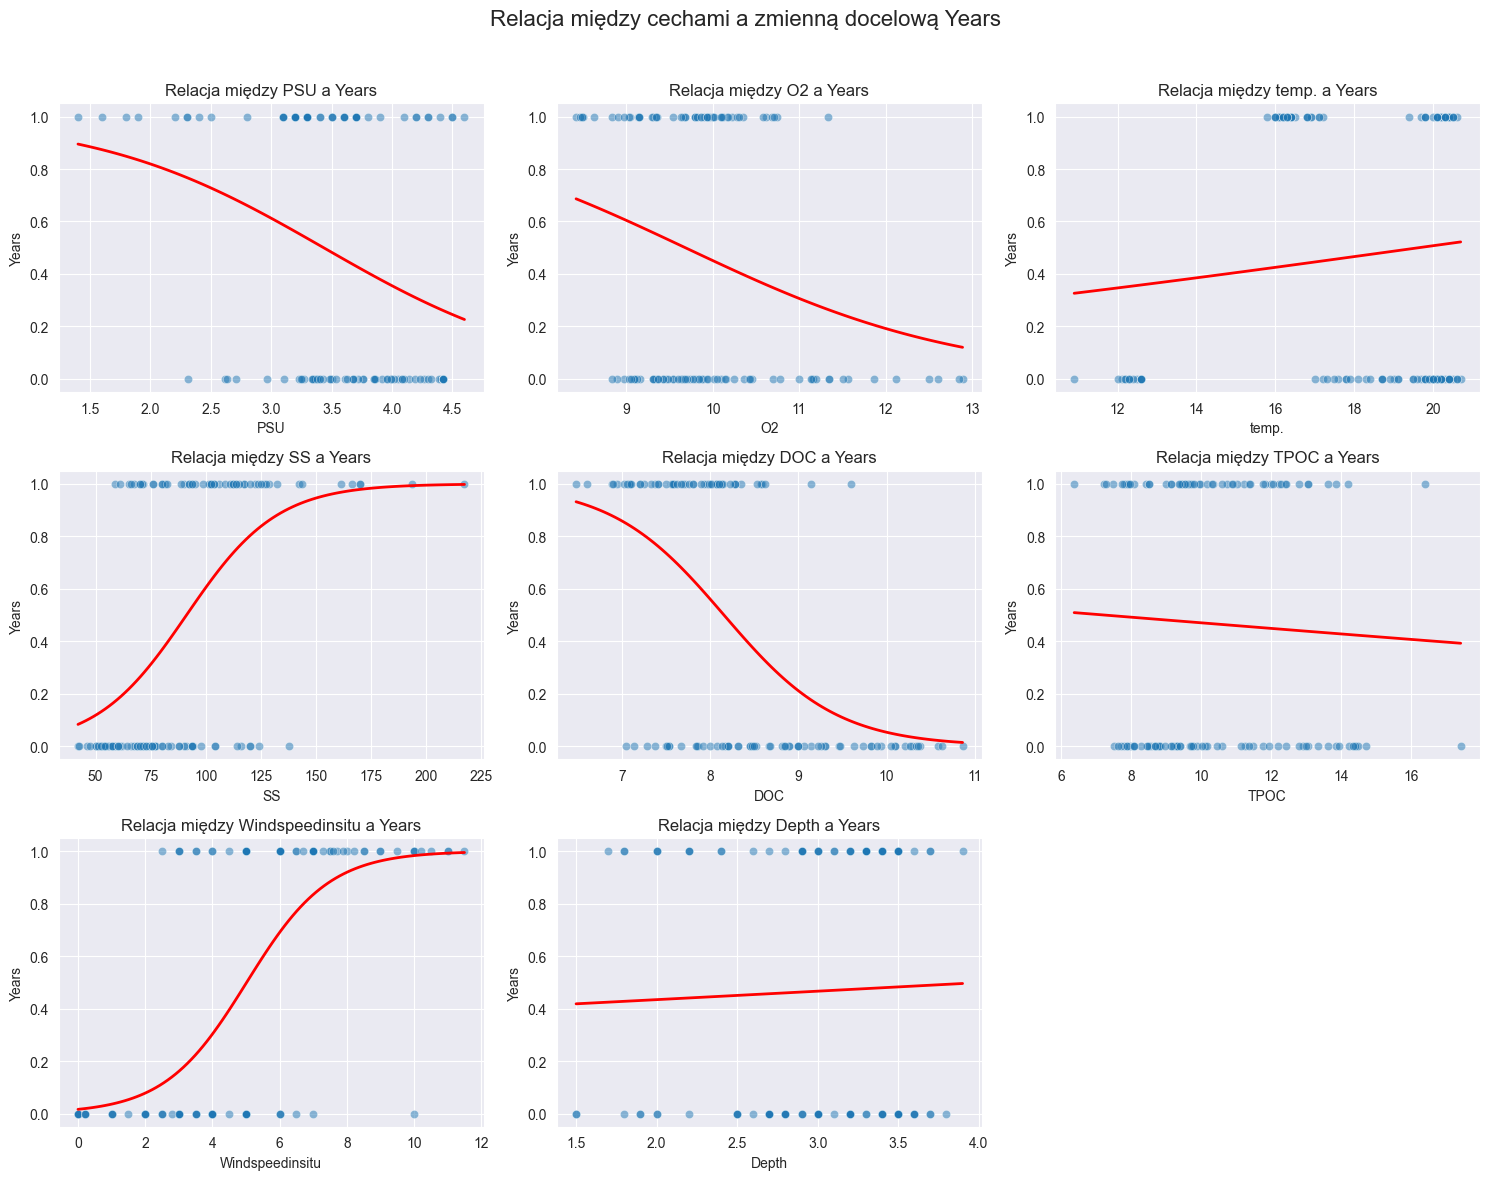

In [212]:
features = [col for col in vlagun_data.columns if col != 'Years']
cols = 3
rows = math.ceil(len(features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
fig.suptitle('Relacja między cechami a zmienną docelową Years', fontsize=16)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    X = vlagun_data[feature].values.reshape(-1, 1)
    Y = vlagun_data['Years'].values.reshape(-1, 1)

    LogR = LogisticRegression()
    LogR.fit(X, np.ravel(Y.astype(int)))

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_prob = LogR.predict_proba(X_range)[:, 1]

    sns.scatterplot(x=vlagun_data[feature], y=vlagun_data['Years'], alpha=0.5, ax=axes[row, col])
    axes[row, col].plot(X_range, y_prob, color='red', linewidth=2)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Years')
    axes[row, col].set_title(f'Relacja między {feature} a Years')

for idx in range(len(features), rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

### Maszyna wektorów nośnych na zbiorze danych VLagun_Phys_Years3

In [213]:
model = SVC()
model.fit(vlagun_train_x, vlagun_train_y)

SVC()

In [214]:
predict_train = model.predict(vlagun_train_x)
print('Years on training data:\n', predict_train)

Years on training data:
 [0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 0]


In [215]:
accuracy_train = accuracy_score(vlagun_train_y, predict_train)
print('Accuracy score on train dataset:', accuracy_train)

Accuracy score on train dataset: 0.7976190476190477


In [216]:
predict_test = model.predict(vlagun_test_x)
print('Years on test data:\n', predict_test)

Years on test data:
 [0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0]


In [217]:
accuracy_test = accuracy_score(vlagun_test_y, predict_test)
print('Accuracy score on test dataset:', accuracy_test)

Accuracy score on test dataset: 0.6944444444444444


In [218]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_scores = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(vlagun_train_x, vlagun_train_y)

    predict_train = model.predict(vlagun_train_x)
    accuracy_train = accuracy_score(vlagun_train_y, predict_train)

    predict_test = model.predict(vlagun_test_x)
    accuracy_test = accuracy_score(vlagun_test_y, predict_test)

    accuracy_scores[kernel] = {'train': accuracy_train, 'test': accuracy_test}
    print(f'Kernel: {kernel}')
    print(f'Train Accuracy: {accuracy_train:.4f}')
    print(f'Test Accuracy: {accuracy_test:.4f}\n')

Kernel: linear
Train Accuracy: 0.9762
Test Accuracy: 0.9444

Kernel: rbf
Train Accuracy: 0.7976
Test Accuracy: 0.6944

Kernel: poly
Train Accuracy: 0.8095
Test Accuracy: 0.7500

Kernel: sigmoid
Train Accuracy: 0.2381
Test Accuracy: 0.3056



Najlepsza dokładność jest w modelu Linear, zarówno treningowa jak i testowa.

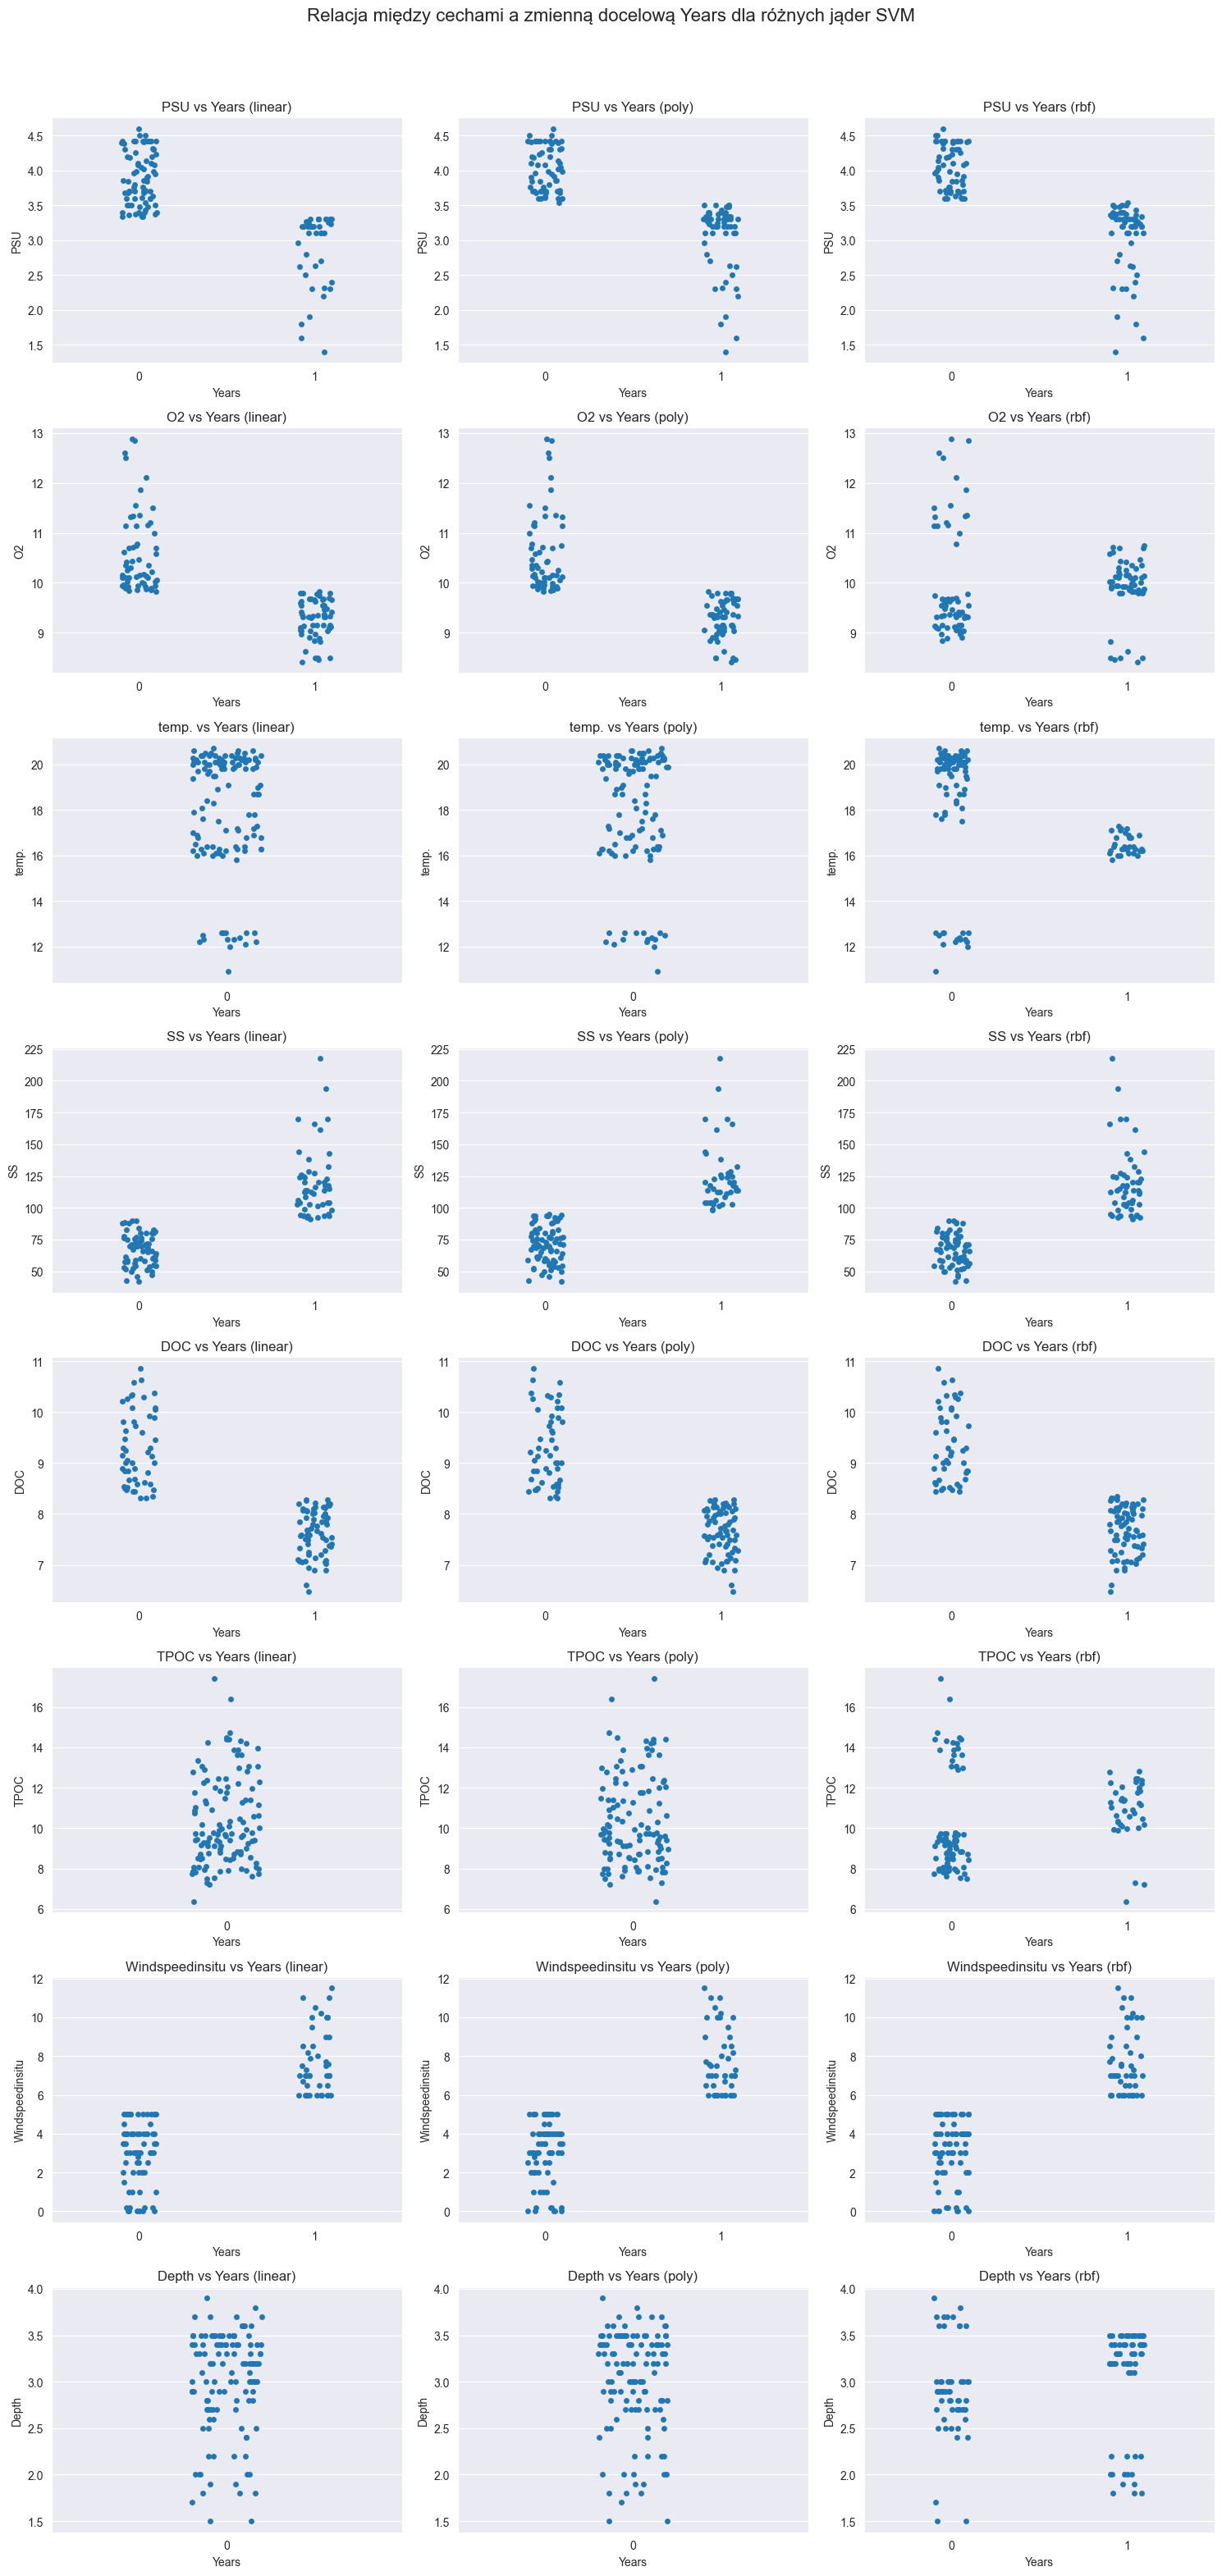

In [223]:
kernels = ['linear', 'poly', 'rbf']
cols = len(kernels)
rows = len(features)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
fig.suptitle('Relacja między cechami a zmienną docelową Years dla różnych jąder SVM', fontsize=16)

for i, feature in enumerate(features):
    X = vlagun_data[[feature]].values
    y = vlagun_data['Years'].values
    
    for j, kernel in enumerate(kernels):
        model = SVC(kernel=kernel)
        model.fit(X, y)
        y_pred = model.predict(X)
        
        sns.stripplot(x=y_pred, y=vlagun_data[feature], jitter=True, ax=axes[i, j])
        axes[i, j].set_xlabel('Years')
        axes[i, j].set_ylabel(feature)
        axes[i, j].set_title(f'{feature} vs Years ({kernel})')

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

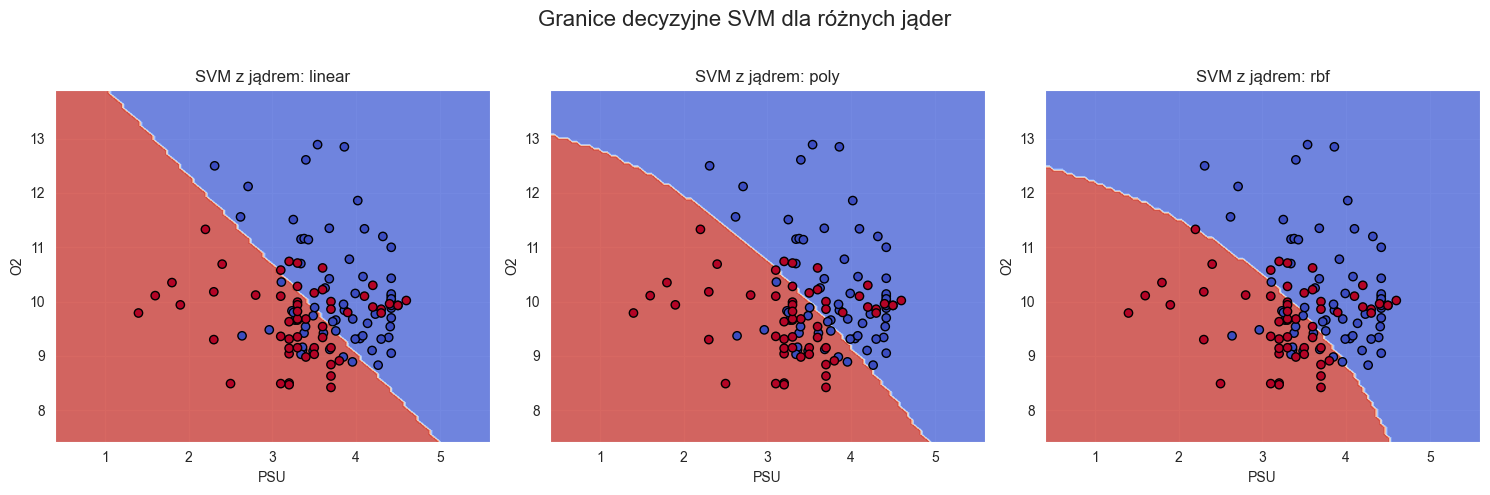

In [227]:
chosen_features = ['PSU', 'O2']
subset = vlagun_data[chosen_features + ['Years']]
subset = subset[subset['Years'].isin([0, 1])]
X = subset[chosen_features].values
y = subset['Years'].values

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Granice decyzyjne SVM dla różnych jąder', fontsize=16)

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    axes[i].set_xlabel(chosen_features[0])
    axes[i].set_ylabel(chosen_features[1])
    axes[i].set_title(f'SVM z jądrem: {kernels[i]}')

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()